In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil

In [ ]:
print(tf.__version__)

2.2.0-rc4


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-09 07:33:28--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.81MB/s    in 43s     

2020-05-09 07:34:13 (7.13 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Ekstrak File
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors'
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
os.listdir(base_dir)

['README_rpc-cv-images.txt',
 'data_training',
 'paper',
 'scissors',
 'rock',
 'rps-cv-images']

In [ ]:
# Cek apakah GPU terhubung atau tidak
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU tidak ditemukan')
print('GPU terhubung: {}'.format(device_name))

In [ ]:
# membuat folder training untuk rock, scissor dan paper
train_dir = os.path.join(base_dir, 'data_training')
rock_train_dir = os.path.join(train_dir, 'rock')
paper_train_dir = os.path.join(train_dir, 'paper')
scissors_train_dir = os.path.join(train_dir, 'scissors')

# pengecekan apakah folder sudah ada atau tidak
# jika tidak maka dibuat
if os.path.isdir(train_dir) == False:
  os.mkdir(train_dir)
  os.mkdir(rock_train_dir)
  os.mkdir(paper_train_dir)
  os.mkdir(scissors_train_dir)

  # menyalin semua file dari folder /rock ke /data_training/rock
  for rock_image_file in os.listdir(rock_dir):
    source = rock_dir + "/" + rock_image_file
    target = train_dir + "/rock/" + rock_image_file
    shutil.copyfile(source, target)

  # menyalin semua file dari folder /paper ke /data_training/paper
  for paper_image_file in os.listdir(paper_dir):
    source = paper_dir + "/" + paper_image_file
    target = train_dir + "/paper/" + paper_image_file
    shutil.copyfile(source, target)

    # menyalin semua file dari folder /scissors ke /data_training/scissors
  for scissors_image_file in os.listdir(scissors_dir):
    source = scissors_dir + "/" + scissors_image_file
    target = train_dir + "/scissors/" + scissors_image_file
    shutil.copyfile(source, target)

In [ ]:
print(os.listdir(train_dir))

# melihat banyak nya gambar
print("banyak gambar rock = ", len(os.listdir(rock_train_dir)))
print("banyak gambar scissor = ", len(os.listdir(scissors_train_dir)))
print("banyak gambar paper = ", len(os.listdir(paper_train_dir)))

['paper', 'scissors', 'rock']
banyak gambar rock =  726
banyak gambar scissor =  750
banyak gambar paper =  712


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    # zoom_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2 # karena data training dan data validasi dalam satu 
    # directory, maka perlu argument pembagian data validasi.
)

# pembentukan generator untuk  data training
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(100, 100),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32, 
    subset='training'
)

# pembentukan generator untuk data validasi 
validation_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(100, 100),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32, 
    subset='validation'
)

# Melihat label kelas
class_lables = list(train_generator.class_indices.keys())
print(class_lables)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.
['paper', 'rock', 'scissors']


In [ ]:
# Pembuatan model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 128)       7

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.SGD(),
   metrics=['accuracy'])

In [ ]:
import time
start_time = time.time()

# Pelatihan
model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch = train_generator.samples // 32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 32,
    verbose=2
)

duration = time.time() - start_time
print("--- %s seconds ---" % (duration))
duration = duration / 60
print("--- %s minutes ---" % (duration))

Epoch 1/20
54/54 - 62s - loss: 1.0967 - accuracy: 0.4026 - val_loss: 1.0939 - val_accuracy: 0.6178
Epoch 2/20
54/54 - 60s - loss: 1.0920 - accuracy: 0.4980 - val_loss: 1.0896 - val_accuracy: 0.5457
Epoch 3/20
54/54 - 60s - loss: 1.0864 - accuracy: 0.6137 - val_loss: 1.0840 - val_accuracy: 0.3750
Epoch 4/20
54/54 - 60s - loss: 1.0751 - accuracy: 0.6254 - val_loss: 1.0669 - val_accuracy: 0.4111
Epoch 5/20
54/54 - 60s - loss: 1.0365 - accuracy: 0.6178 - val_loss: 0.9841 - val_accuracy: 0.7091
Epoch 6/20
54/54 - 60s - loss: 0.9203 - accuracy: 0.6393 - val_loss: 0.7444 - val_accuracy: 0.8173
Epoch 7/20
54/54 - 60s - loss: 0.6791 - accuracy: 0.7539 - val_loss: 1.5565 - val_accuracy: 0.5817
Epoch 8/20
54/54 - 59s - loss: 0.5137 - accuracy: 0.8220 - val_loss: 0.2849 - val_accuracy: 0.8990
Epoch 9/20
54/54 - 60s - loss: 0.3233 - accuracy: 0.8906 - val_loss: 0.2577 - val_accuracy: 0.9087
Epoch 10/20
54/54 - 60s - loss: 0.3042 - accuracy: 0.8953 - val_loss: 0.2309 - val_accuracy: 0.9207
Epoch 11/

Saving 0657zSfiTYzP2jrl.png to 0657zSfiTYzP2jrl (2).png
0657zSfiTYzP2jrl.png
[[1. 0. 0.]]
paper


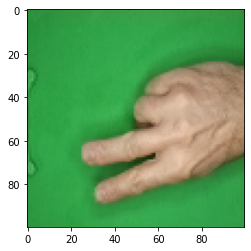

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100, 100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)

  class_lables = list(train_generator.class_indices.keys())

  print(classes)
  class_indice = 0
  for i in range(len(classes[0])):
      if classes[0][i] > classes[0][0]:
          class_indice = i
  test_class = class_lables[class_indice]
  print(test_class)
